# [ML-04] Model validation

## Overfitting and validation

**Overfitting** is a typical problem of supervised learning. It occurs when a model fits satisfactorily the training data, but fails on new data. The purpose of **validation** is to dismiss the concerns about overfitting raised by the use of complex machine learning models. These concerns are well justified, since many popular ML methods are prone to overfit the training data.

In the simplest approach to validation, we derive the model from a **training data set**, trying it on a **test data set**. The training and test sets can have a temporal basis (*e.g*. training with the first ten months of the year and testing with the last two months), or they can be obtained by means of a **random split** of a single data set.

For the top powerful ML methods, such as gradient boosting or deep learning, overfitting is part of the process, so practitioners take the metrics calculated on the test data set as the valid ones. When this is applied systematically, the principle of testing the model on data which have not been used to obtain it is no longer valid. The standard approach to this problem is to use a third data set, the **validation data set**, in the model selection process, keeping the test set apart, for the final evaluation.

**Cross-validation** is a more sophisticated approach, recommended for small data sets. It has many variations, among them **$k$-fold cross-validation**, in which the original data set is randomly partitioned into $k$ equally sized subsets. It is assumed that the model is evaluated with a single evaluation score (otherwise it would get very complex). One of the $k$ subsets is used for testing and the other subsets for training, and the model is evaluated on the test subset. This process is repeated for each subset. The resulting evaluation scores (either R-squared or accuracy) can then be averaged to produce a single value, which is taken as the score of the model. $k=3$ and $k=5$ are choices. If you wish to keep a test set apart from the process, you can split first the data in two, performing the cross-validation in one subset, while keeping the other subset for the final test. This approach is quite popular among practitioners.

## Train-test split in scikit-learn

In scikit-learn, the subpackage `model_selection` provides a validation toolkit for supervised learning. Suppose that you are given a target vector `y` and a features matrix `X`. A random **train-test split** can be obtained with:

```
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
```

Setting `test_size=0.2`, you get a 80-20 split, which is quite popular, though there is nothing special in a 20% test size. The idea behind this partition is that it is not reasonable to waste too much data on testing. Also, note that you have to split twice if you wish to have a training set, a validation set and a test set.

For an example, take a classifier `clf`, created as a `LogisticRegression()` instance. You start by training the model with the method `.fit()`, using only the training set:

```
clf.fit(X_train, y_train)
```

Then, you can evaluate the model separately on both data sets and compare the results. If the evaluation is based on the accuracy, this would be:

```
clf.score(X_train, y_train), clf.score(X_test, y_test)
```

Overfitting happens when there is a relevant difference between these two metrics. If you wish to compare a collection of candidate models, you will replace here the test set by the validation set, leaving the test set apart. By applying this process repeatedly, you can select the model with the best performance on the validation set, using the test set for the final evaluation. The same ideas can be applied for regression models.

*Note*. The function `train_test_split()` can be applied to any number of array-like objects of the same length. It performs a random split on each of those objects, selecting the same rows for all of them.

## Cross-validation in scikit-learn

The subpackage `model_selection` also has cross-validation functions. The simplest one is `cross_val_score()`:

```
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=3)
```

This function would return here a vector of three accuracy scores. While you can average these scores to get an overall score for the model, you may also take a look at the variation across folds, to decide whether you will trust the model. The argument `cv=3` sets the number of folds. The default is `cv=5`. The default metrics are the R-squared statistic and the accuracy, but the parameter `scoring` allows you to use alternative metrics. For instance, with the argument `scoring='precision'`, the function `cross_val_score()` would return precision scores.

## Example - Polycystic ovary syndrome (PCOS) diagnosis

### Introduction

The **polycystic ovary syndrome** (PCOS) is a disorder involving infrequent, irregular or prolonged menstrual periods, and often excess male hormone (androgen) levels. The ovaries develop numerous small collections of fluid (called follicles) and may fail to regularly release eggs.

The most common PCOS symptoms are missed, irregular, infrequent, or prolonged periods. Other symptoms include hair loss, or hair in places you don't want it, acne, darkened skin, mood changes, weight gain and others. Irregular periods, usually with a lack of ovulation, can make it difficult to become pregnant. PCOS is a leading cause of infertility.

This example is concerned with the prediction of PCOS from a set of physical and clinical parameters. The data have been collected from 10 different hospitals across Kerala, India.

### The data set

The file `pcos.csv` contains data on 538 subjects, including an identifier, a label signalling the occurrence of PCOS, and 38 features. The columns are:

* `id`, a unique identifier for the subject.

* `pcos`, whether the subject has PCOS (1 = yes, 0 = no).

* `age`, the subject's age (years).

* `weight`, the subject's weight (kg).

* `height`, the subject's height (cm).

* `blood`, the subject's blood group (11 = A+, 12 = A-, 13 = B+, 14 = B-, 15 = O+, 16 = O-, 17 = AB+, 18 = AB-).			

* `pulse`, the subject's pulse rate (bpm).

* `rr`, the subject's respiratory rate (breaths/min).

* `hb`, the subject's hemoglobin level (g/dl).

* `cycle`, the subject's menstrual cycle (R/I).

* `cyclelen`, the subject's cycle length (days).

* `marriage`, time since the subject was married (years).

* `pregnant`, whether the subjects is pregnant (1 = yes, 0 = no).

* `abortions`, the subject's number of abortions.

* `beta_hcg1`, the beta-hCG level (mIU/mL) in the first pregnancy test. Beta-hCG is a shorthand term for a blood test used to measure human chorionic gonadotropin (hCG) levels in early pregnancy. The hCG is a hormone for the maternal recognition of pregnancy, with two subunits, alpha and beta.

* `beta_hcg2`, the blood beta-HCG level (mIU/mL) in the second pregnancy test. When only one test exists, the value entered in this column has been copied from the previous column.

* `fsh`, the blood FSH level (miU/mL). The follicle-stimulating hormone (FSH) helps control the menstrual cycle and stimulates the growth of eggs in the ovaries. The FSH test can used to find the cause of infertility, to find the reason for irregular or stopped menstrual periods, or other purposes.

* `lh`, the blood LH level (mIU/mL).The luteinizing hormone (LH) plays an important role in sexual development and functioning. The LH test is used for the same purposes as the FSH test.

* `hip`, the hip perimeter (inch).

* `waist`, the waist perimeter (inch).

* `tsh`, the blood TSH level (miU/mL). The thyroid stimulating hormone (FSH) helps control the weight, body temperature, muscle strength, and other things. The TSH test can used to find  out how well the thyroid is working.

* `amh`, the blood AMH level (ng/mL). The anti-mullerian hormone (AMH) plays a key role in developing a baby’s sex organs while in the womb. The AMH test provides information on the number of remaining eggs and whether the ovaries might be aging too quickly.

* `prl`, the blood PRL level (ng/mL). When women are pregnant or have just given birth, their prolactin (PRL) levels increase so they can make breast milk.The  doctor may order a prolactin test given symptoms like irregular or no periods, infertility, breast milk discharge not being pregnant or nursing, etc.

* `d3`, the blood vitamin D3 level (ng/mL). The vitamin D test is used to screen for low levels of vitamin D so the patient can be treated with supplements to prevent health problems.

* `prg`, the blood PRG level (ng/mL). Progesterone (PRG) is a hormone that prepares the uterus for pregnancy. A PRG test may be used to help find the cause of female infertility, check whether fertility treatments are working, find out the risk of a miscarriage, and other purposes.

* `rbs`, the blood glucose level (mg/dL) measured in a random blood sugar test (RBS). The RBS test is a quick test that a doctor or nurse can carry out at short notice in their office or clinic. The patient does not need to fast beforehand.

* `weight_gain`, a dummy for weight gain.

* `hair_growth`, a dummy for hair growth.

* `skin_dark`, a dummy for skin darkening.

* `hair_loss`, a dummy for hair loss.

* `pimples`, a dummy for having pimples.

* `fastfood`, a dummy for fast food consumption.

* `exercise`, a dummy for doing regular exercise.

* `systolic`, systolic blood pressure (mmHg).

* `diastolic`, diastolic blood pressure (mmHg).

* `lfollicle`, number of follicles in the left ovary. The ovarian follicles are small sacs filled with fluid that are found inside a woman's ovaries. They secrete hormones which influence stages of the menstrual cycle and women begin puberty.

* `rfollicle`, number of follicles in the right ovary.

* `lsize`, average size of the follicles in the left ovary (mm).

* `fsize`, average size of the follicles in the left ovary (mm).

* `endometrium`, the thickness of the endometrium (mm).

Source: Kaggle.


### Questions

Q1. Develop a **decision tree classifier** for the diagnosis of PCOS. Which are the most **relevant features**?

Q2. There are three features which are used in this context: (a) the body mass index (BMI) is the body mass divided by the square of the body height (kg/m2), (b) the LH/FSH ratio, and (c) the hip/waist ratio. Does your model improve by adding these three features?

Q3. Perform a **3-fold cross-validation** of your model. 

Q4. Reduce the size of the tree if you are not happy with the results obtained.

### Importing the data

As in the preceding examples, we use the Pandas funcion `read_csv()` to import the data from a GitHub repository. Here, we take the column `id` as the index (`index_col=0`).

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/lab30041954/Data/main/'
df = pd.read_csv(path + 'pcos.csv', index_col=0)

### Exploring the data

We print a report of the content of `df` with the method `.info()`. Everything is as expected, so far. There are no missing values.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 538 entries, 1 to 541
Data columns (total 39 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pcos         538 non-null    int64  
 1   age          538 non-null    int64  
 2   weight       538 non-null    float64
 3   height       538 non-null    float64
 4   blood        538 non-null    int64  
 5   pulse        538 non-null    int64  
 6   rr           538 non-null    int64  
 7   hb           538 non-null    float64
 8   cycle        538 non-null    int64  
 9   cyclelen     538 non-null    int64  
 10  marriage     538 non-null    float64
 11  pregnant     538 non-null    int64  
 12  abortions    538 non-null    int64  
 13  beta_hcg1    538 non-null    float64
 14  beta_hcg2    538 non-null    float64
 15  fsh          538 non-null    float64
 16  lh           538 non-null    float64
 17  hip          538 non-null    int64  
 18  waist        538 non-null    int64  
 19  tsh          

The **incidence** of PCOS in this sample is 32.7%, so we don't have a serious case of imbalance here. Note that this incidence applies to a sample extracted from a hospital female population, so we have to be careful when drawing conclusions.

In [3]:
round(df['pcos'].mean(), 3)

0.327

### Target vector and features matrix

We create a target vector and a feature matrix. The target vector is the first column (`pcos`). Note that one of the features, `blood`, is categorical, so we have to replace it by a collection of dummies. 

On one side, we create a submatrix integrating all the columns, except `blood`.

In [4]:
y = df['pcos']
X1 = df.drop(columns=['blood', 'pcos'])

On the other side, we apply the Pandas function `get_dummies()` to the categorical feature.

In [5]:
X2 = pd.get_dummies(df['blood'])
   ...: X2.columns

Index([11, 12, 13, 14, 15, 16, 17, 18], dtype='int64')

The column names of this matrix are integers, which are not accepted by scikit-learn. This is easy to fix, since, in Pandas, the current column names can be directly replaced by a new list of names.

In [6]:
X2.columns = ['A+', 'A-', 'B+', 'B-', 'O+', 'O-', 'AB+', 'AB-']

With the Pandas function `concat()`, we join the two parts of the new feature matrix (you can also do this with the methods `.merge()` or `.join()`). The argument `axis=1` indicates that the two submatrices are joined horizontally (the default is to join vertically).

In [7]:
X = pd.concat([X1, X2], axis=1)

### Q1. Decision tree classifier

To address question Q1, we train a decision tree classifier on tis data set. Given the dimensions of the features matrix, we start with maximum depth 5.

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

The accuracy is quite high. Remember that this applies to a very specific population.

In [9]:
round(clf.score(X, y), 3)

0.937

Nevertheless, the confusion matrix shows us that the accuracy is not that high for the PCOS patients (83.5%).

In [10]:
y_pred = clf.predict(X)
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_pred)

array([[357,   5],
       [ 29, 147]])

A report on the importance of the features involved in this tree can be obtained as in the preceding lecture.

In [11]:
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance[importance > 0].sort_values(ascending=False).round(3)

rfollicle      0.442
hair_growth    0.109
weight_gain    0.099
lfollicle      0.084
amh            0.048
cyclelen       0.046
lh             0.043
lsize          0.036
endometrium    0.020
fastfood       0.019
beta_hcg1      0.017
weight         0.015
age            0.013
waist          0.008
dtype: float64

So far, it is pretty obvious which are the relevant features here.

### Q2. Extra features

We add now the extra features suggested in question Q2 to the current features matrix.

In [12]:
X['bmi'] = df['weight']/df['height']**2
X['lh_fsh'] = df['lh']/df['fsh']
X['hip_waist'] = df['hip']/df['waist']

We train again the decision tree classifier with the enlarged features matrix.

In [13]:
clf.fit(X, y)
round(clf.score(X, y), 3)

0.942

So, the accuracy of the new model is a bit higher. The LH/FSH ratio seems to be responsible for the improvement.

In [14]:
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance[importance > 0].sort_values(ascending=False).round(3)

rfollicle      0.430
hair_growth    0.106
weight_gain    0.096
lfollicle      0.082
lh_fsh         0.046
amh            0.040
beta_hcg1      0.039
lsize          0.035
cyclelen       0.024
endometrium    0.019
fastfood       0.019
weight         0.016
bmi            0.015
fsh            0.014
lh             0.012
age            0.008
dtype: float64

### Q3. 3-fold cross-validation

We address now the validation of the decision tree classifier. We use the function `cross_val_score()`, from the subpackage `model_selection`. We use a 3-fold partition, as suggested.

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X, y, cv=3).round(3)

array([0.844, 0.732, 0.844])

We have a clear case of **overfitting**. Let us try with a smaller tree.

### Q4. Reduce the size of the decision tree

We set now the maximum depth at 4, which will potentially halve the number of leaf nodes. The accuracy is just a bit lower.

In [16]:
clf = DecisionTreeClassifier(max_depth=4)
clf.fit(X, y)
round(clf.score(X, y), 3)

0.931

So far, we still have an overfitting issue. Though the accuracy on the three folds is more homogeneous, which is good news.

In [17]:
cross_val_score(clf, X, y, cv=3).round(3)

array([0.861, 0.749, 0.832])

The decision tree models trained so far have an average accuracy of 81.5% in the cross-validation analysis. Let us accept this and try a small tree, which will have the advantage of being easier to use as an **expert system**, to help the doctor's diagnosis. We try now a different approach to the control of the growth of the tree, based on the **maximum number of leaves**.

In [18]:
clf = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=6)
clf.fit(X, y)
round(clf.score(X, y), 3)

0.859

This looks more realistic. The features involved in this tree are identified in the importance report.

In [19]:
importance = pd.Series(clf.feature_importances_, index=X.columns)
importance[importance > 0].sort_values(ascending=False).round(3)

rfollicle      0.613
weight_gain    0.149
hair_growth    0.120
amh            0.061
lfollicle      0.057
dtype: float64

The cross-validation does not give us a surprise. We have an average accuracy of 82%, and the three folds produce similar scores.

In [20]:
cross_val_score(clf, X, y, cv=3).round(3)

array([0.828, 0.821, 0.81 ])

### Plotting the tree

The interpretability of such a simple model can be enhanced by plotting the tree as explained in lecture ML-03. The function `plot_tree` of the module `tree` can be combined with `matplotlib.pyplot` specifications.

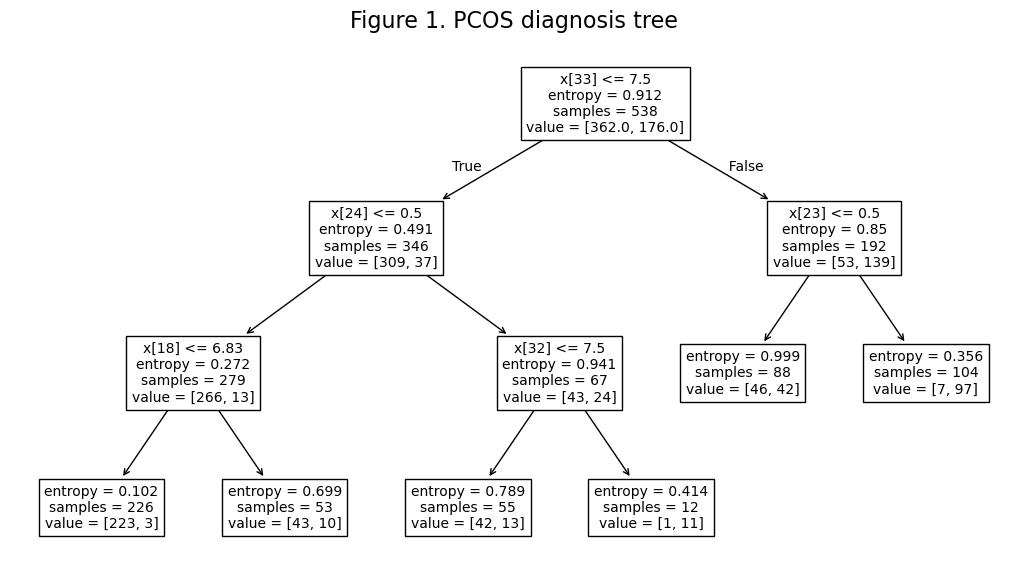

In [21]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(13,7))
plot_tree(clf, fontsize=10)
plt.title('Figure 1. PCOS diagnosis tree', fontsize=16);

### Homework

1. Calculate the confusion matrix for the last model, on the whole data set. Are the accuracies on the positive and the negative group more balanced? What would you prioritize here, the true positive rate or the false positive rate?

2. Apply the same cross-validation approach to a logistic regression model. Do you get better results?

3. Cross-validation in scikit-learn uses a non-random specific splitting strategy called `StratifiedKFold`. So you get the same results across calls of `cross_val_score`. You can change this easily by replacing `X` and `y` by "shuffled" versions, which can be created with the method `.sample()`. Try that and see what happens. Take care of shuffling `X` and `y` in the same way, by giving the same value to the parameter `random_state` of `.sample()`.